# plot_frontend_statistics

Plots statistics collected from the frontend related to feature detection,
RANSAC pose recovery, sparse stereo matching and timing.
    
TODO(marcus): add ground-truth comparison for ransac rotation and translation.

In [ ]:
import yaml
import os
import logging
import matplotlib.pyplot as plt
import pandas as pd
log = logging.getLogger(__name__)
log.setLevel(logging.INFO)
if not log.handlers:
    ch = logging.StreamHandler()
    ch.setLevel(logging.INFO)
    ch.setFormatter(logging.Formatter('%(levelname)s - %(message)s'))
    log.addHandler(ch)

In [123]:
# Parse frontend statistics csv file.
output_dir = "~/spark_vio_output/test_4/"
stats_file = os.path.join(os.path.expandvars(output_dir), "output_frontend_statistics.csv")

# Convert to tidy pandas DataFrame object.
df = pd.read_csv(stats_file)
df['Frame ID'] = [i for i in range(len(df['nrDetFeat'].tolist()))]

In [124]:
# Helper functions for processing data summary.
def get_mean(attrib):
    ls = df[attrib].tolist()
    return float(sum(ls)) / len(ls)

def get_min(attrib):
    return min(df[attrib])

def get_max(attrib):
    return max(df[attrib])

# Construct and visualize summary. TODO(marcus): use a LaTeX table.
summary_stats = [
    ("Average number of detected features", get_mean("nrDetFeat")),
    ("Minimum number of detected features", get_min("nrDetFeat")),
    ("Average number of tracked features" , get_mean("nrTrackFeat")),
    ("Minimum number of tracked features", get_min("nrTrackFeat")),
    ("Average number of mono ransac inliers", get_mean("nrMoIn")),
    ("Minimum number of mono ransac inliers", get_min("nrMoIn")),
    ("Average number of stereo ransac inliers", get_mean("nrStIn")),
    ("Minimum number of stereo ransac inliers", get_min("nrStIn")),
    ("Average number of mono ransac putatives", get_mean("nrMoPu")),
    ("Minimum number of mono ransac putatives", get_min("nrMoPu")),
    ("Average number of stereo ransac putatives", get_mean("nrStPu")),
    ("Minimum number of stereo ransac putatives", get_min("nrStPu")),
]

attrib_len = [len(attrib[0]) for attrib in summary_stats]
max_attrib_len = max(attrib_len)

print "\nStatistic summary:\n"
for entry in summary_stats:
    attrib = entry[0]
    value = entry[1]
    spacing = max_attrib_len - len(attrib)
    print attrib + " "*spacing + ": " + str(value)


Statistic summary:

Average number of detected features      : 240.485611511
Minimum number of detected features      : 48
Average number of tracked features       : 137.71942446
Minimum number of tracked features       : 16
Average number of mono ransac inliers    : 240.485611511
Minimum number of mono ransac inliers    : 48
Average number of stereo ransac inliers  : 50.7014388489
Minimum number of stereo ransac inliers  : 2
Average number of mono ransac putatives  : 47.6510791367
Minimum number of mono ransac putatives  : 2
Average number of stereo ransac putatives: 22.2050359712
Minimum number of stereo ransac putatives: 2


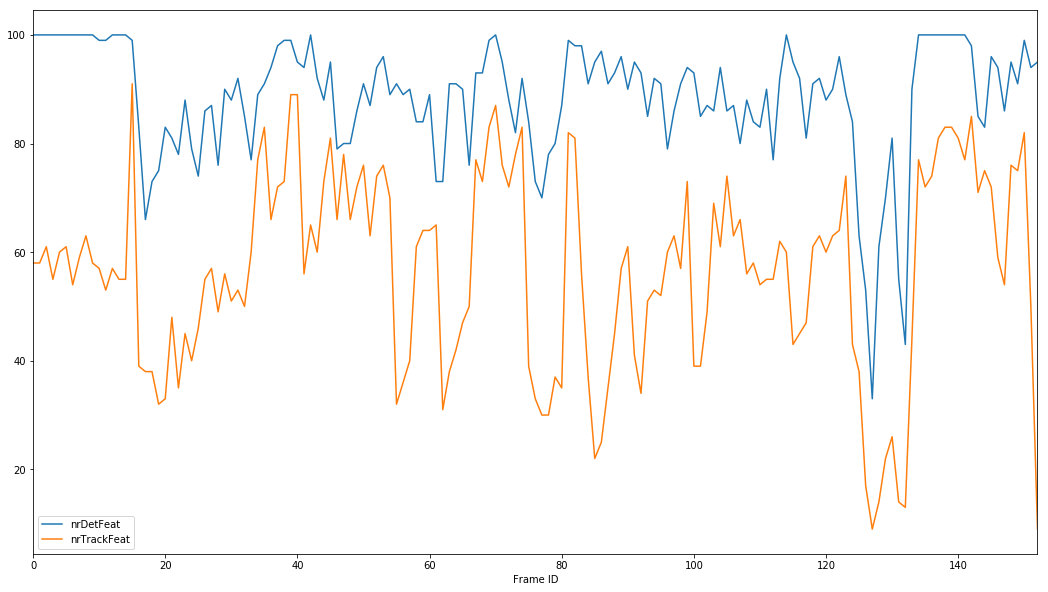

In [80]:
# Plot feature tracking statistics.
fig0, axes0 = plt.subplots(nrows=1, ncols=1, figsize=(18,10), squeeze=False)

df.plot(kind="line", x='Frame ID', y="nrDetFeat", ax=axes0[0,0])
df.plot(kind="line", x='Frame ID', y="nrTrackFeat", ax=axes0[0,0])

plt.show()

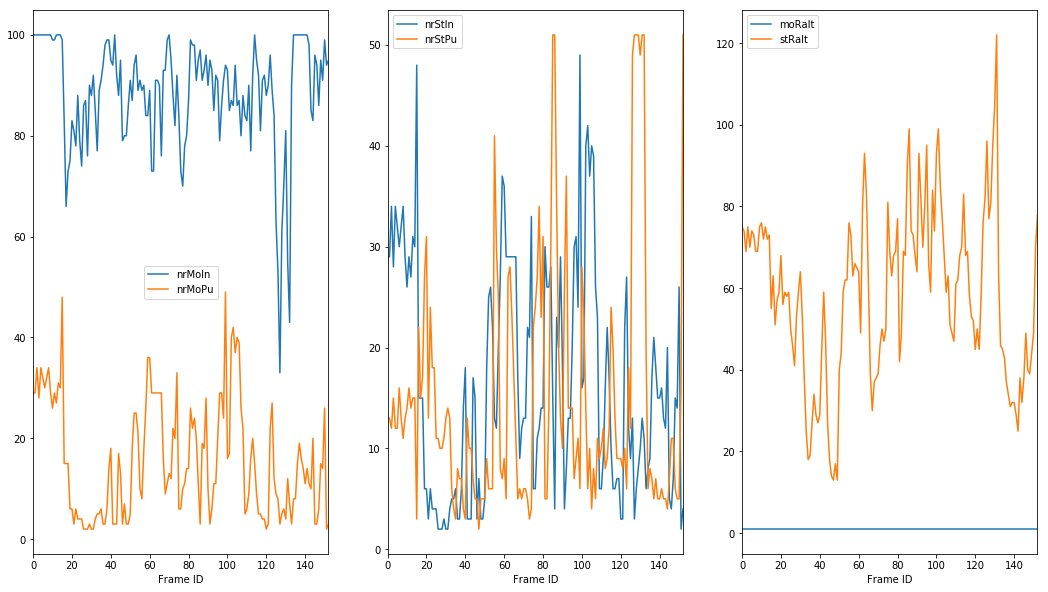

In [81]:
# Plot ransac inlier, putative and iteration statistics.

fig1, axes1 = plt.subplots(nrows=1, ncols=3, figsize=(18,10), squeeze=False)

df.plot(kind="line", x='Frame ID', y="nrMoIn", ax=axes1[0,0])
df.plot(kind="line", x='Frame ID', y="nrMoPu", ax=axes1[0,0])
df.plot(kind="line", x='Frame ID', y="nrStIn", ax=axes1[0,1])
df.plot(kind="line", x='Frame ID', y="nrStPu", ax=axes1[0,1])
df.plot(kind="line", x='Frame ID', y="moRaIt", ax=axes1[0,2])
df.plot(kind="line", x='Frame ID', y="stRaIt", ax=axes1[0,2])

plt.show()

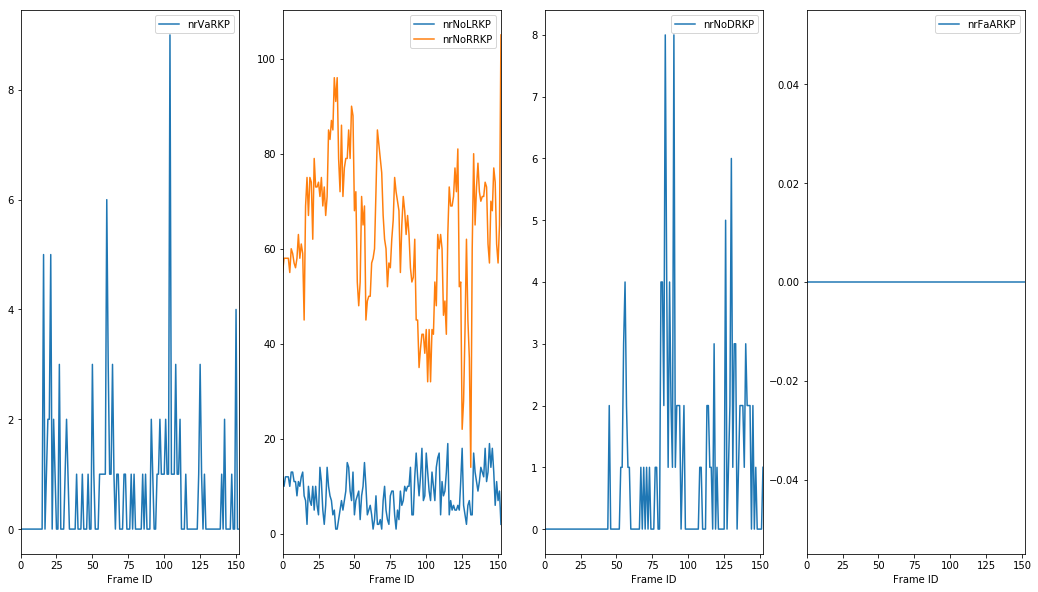

In [82]:
# Plot sparse-stereo-matching statistics.

fig3, axes3 = plt.subplots(nrows=1, ncols=4, figsize=(18,10), squeeze=False)

df.plot(kind="line", x='Frame ID', y="nrVaRKP", ax=axes3[0,0])
df.plot(kind="line", x='Frame ID', y="nrNoLRKP", ax=axes3[0,1])
df.plot(kind="line", x='Frame ID', y="nrNoRRKP", ax=axes3[0,1])
df.plot(kind="line", x='Frame ID', y="nrNoDRKP", ax=axes3[0,2])
df.plot(kind="line", x='Frame ID', y="nrFaARKP", ax=axes3[0,3])

plt.show()

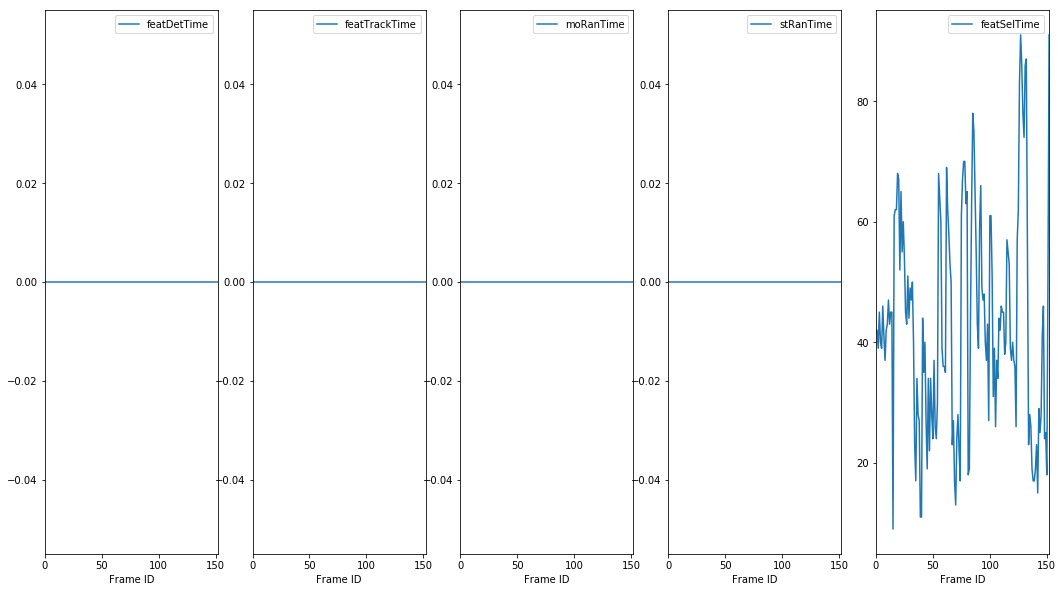

In [83]:
# Plot timing statistics.

fig2, axes2 = plt.subplots(nrows=1, ncols=5, figsize=(18,10), squeeze=False)

df.plot(kind="line", x='Frame ID', y="featDetTime", ax=axes2[0,0])
df.plot(kind="line", x='Frame ID', y="featTrackTime", ax=axes2[0,1])
df.plot(kind="line", x='Frame ID', y="moRanTime", ax=axes2[0,2])
df.plot(kind="line", x='Frame ID', y="stRanTime", ax=axes2[0,3])
df.plot(kind="line", x='Frame ID', y="featSelTime", ax=axes2[0,4])

plt.show()